<a href="https://colab.research.google.com/github/mwithgod3952/Machine_Learning_Theory_jh/blob/master/study_DTW(Dynamic_Time_Warping).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

***DTW(Dynamic Time Wrapping)***

    - 개념 : 가장 기본적으로 접근할 수 있는 개념은, 두개의 시계열 데이터 간 유사도를 알아내기 위한 알고리즘 중 하나라고 이해하는 것이다.
    두 개의 데이터 간 유사도를 판별할 수 있는 방안에 대하여, 가장 쉽게 접근할 수 있는 방법은 두 데이터간 유사도 측정 방법은 아무래도 MSE(Mean Squared Error) Distance를 계산하는 것일텐데, 
    이는 Sequences 에 대한 one to one 비교는 가능할지라도, 

    - lagging현상을 고려할 수 없는 점 
    - '패턴' 비교 어려움과 같은 문제

<img src='https://t1.daumcdn.net/cfile/tistory/222BDE43595207D238' />  

In [ ]:
# !pip install finance-datareader

In [55]:
from math import *
import numpy as np
import sys
import FinanceDataReader as fdr

import matplotlib as mpl
mpl.font_manager._rebuild()

import matplotlib.pyplot as plt
plt.rcParams["font.family"] = 'nanummyeongjo'
plt.rcParams["axes.grid"] = True
plt.rcParams["figure.figsize"] = (12,6)
plt.rcParams["axes.formatter.useoffset"] = False
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["axes.formatter.limits"] = -10000, 10000

from sklearn.preprocessing import minmax_scale

In [10]:
stock_AAPL = fdr.DataReader('AAPL', '2017')
stock_GOOG = fdr.DataReader('GOOG', '2017')

In [29]:
print("stock_GOOG dataset shape : ", stock_GOOG.shape)
print("stock_AAPL dataset shape : ", stock_AAPL.shape)
print("")
print("list of columns of datasets : ", set(sum([stock_AAPL.columns.tolist(), stock_GOOG.columns.tolist()], [])))

stock_GOOG dataset shape :  (1139, 6)
stock_AAPL dataset shape :  (1139, 6)

list of columns of datasets :  {'Close', 'Volume', 'Open', 'Low', 'Change', 'High'}


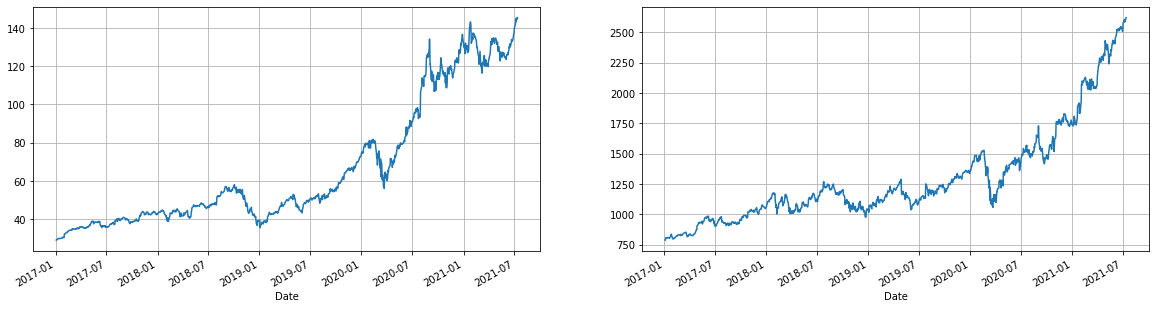

In [50]:
fig, ax = plt.subplots(1,2, figsize=(20,5))
stock_AAPL["Close"].plot(ax=ax[0]), stock_GOOG["Close"].plot(ax=ax[1]) 
plt.show()

Total Distance is  66.64815606449194


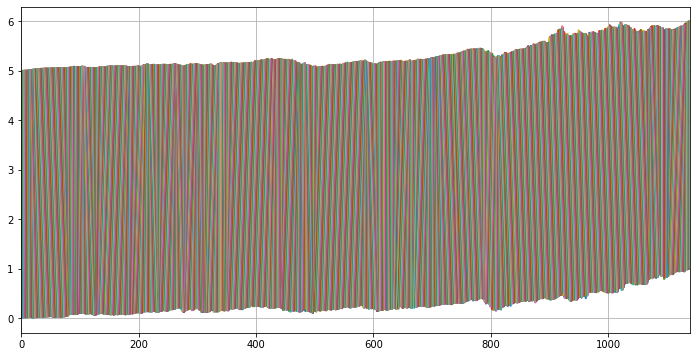

In [56]:
def DTW(A, B, window = sys.maxsize, d = lambda x,y: abs(x-y)):
    A, B = np.array(A), np.array(B)
    M, N = len(A), len(B)
    cost = sys.maxsize * np.ones((M, N))

    cost[0, 0] = d(A[0], B[0])
    for i in range(1, M):
        cost[i, 0] = cost[i-1, 0] + d(A[i], B[0])

    for j in range(1, N):
        cost[0, j] = cost[0, j-1] + d(A[0], B[j])
    for i in range(1, M):
        for j in range(max(1, i - window), min(N, i + window + 1)):
            choices = cost[i - 1, j - 1], cost[i, j-1], cost[i-1, j]
            cost[i, j] = min(choices) + d(A[i], B[j])

    n, m = N - 1, M - 1
    path = []

    while (m, n) != (0, 0):
        path.append((m, n))
        m, n = min((m - 1, n), (m, n - 1), (m - 1, n - 1), key = lambda x: cost[x[0], x[1]])
    
    path.append((0,0))
    return cost[-1, -1], path

def main():
    A, B = np.array(minmax_scale(stock_GOOG["Close"])), np.array(minmax_scale(stock_AAPL["Close"]))

    cost, path = DTW(A, B, window = 14)
    print('Total Distance is ', cost)

    offset = 5
    plt.xlim([-1, max(len(A), len(B)) + 1])
    plt.plot(A)
    plt.plot(B + offset)
    for (x1, x2) in path:
        plt.plot([x1, x2], [A[x1], B[x2] + offset])
    plt.show()

if __name__ == '__main__':
    main()